In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_gen_vs_avg_min_two_folders(folder1, folder2, label1='Folder 1', label2='Folder 2', agg='mean'):

    def load_stats(folder):
        gen_min_list = []
        for filename in os.listdir(folder):
            if filename.endswith(".csv"):
                file_path = os.path.join(folder, filename)
                try:
                    df = pd.read_csv(file_path, sep='\t')
                    if {'gen', 'max'}.issubset(df.columns):
                        gen_min_list.append(df[['gen', 'max']])
                    else:
                        print(f"Skipping {filename} in {folder}: Missing 'gen' or 'min' column.")
                except Exception as e:
                    print(f"Error reading {filename} in {folder}: {e}")
        if not gen_min_list:
            return None
        combined = pd.concat(gen_min_list)
        stats = combined.groupby('gen')['max'].agg([agg, 'std']).reset_index()
        return stats

    stats1 = load_stats(folder1)
    stats2 = load_stats(folder2)

    if stats1 is None and stats2 is None:
        print("No valid data found in either folder.")
        return

    # Plotting
    plt.figure(figsize=(10, 6))

    if stats1 is not None:
        plt.plot(stats1['gen'], stats1['mean'], label=label1, color='blue', marker='.')
        # plt.fill_between(
        #     stats1['gen'],
        #     stats1['mean'] - stats1['std'],
        #     stats1['mean'] + stats1['std'],
        #     color='blue',
        #     alpha=0.3,
        #     label=f'{label1} ±1 Std Dev'
        # )

    if stats2 is not None:
        plt.plot(stats2['gen'], stats2['mean'], label=label2, color='orange', marker='.')
        # plt.fill_between(
        #     stats2['gen'],
        #     stats2['mean'] - stats2['std'],
        #     stats2['mean'] + stats2['std'],
        #     color='orange',
        #     alpha=0.3,
        #     label=f'{label2} ±1 Std Dev'
        # )

    plt.title("Generation vs Average Min (with Std Dev)")
    plt.xlabel("Generation")
    plt.ylabel("Min Value")
    # plt.ylim(0, 2)
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()


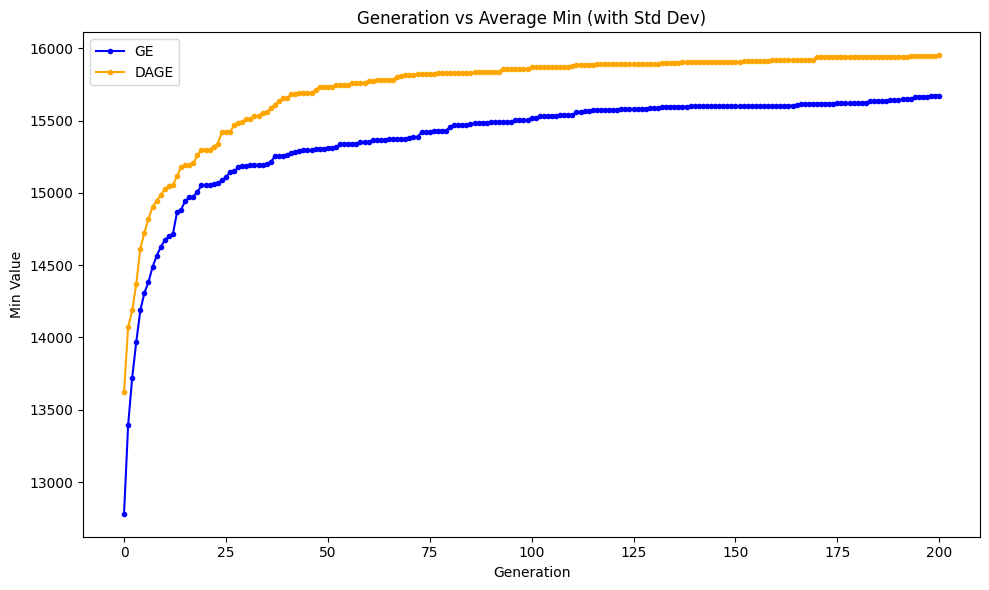

In [10]:
plot_gen_vs_avg_min_two_folders("GE", "DAGE", label1="GE", label2="DAGE")